In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
result1 = np.zeros((2160))
i = 0

In [3]:
months = [f"{x:02d}" for x in range(1,13)]
years = [f"{x:04d}" for x in range(150,330)]
i =0
for yy in years:
    for mm in months:
        data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.EVAP.nc')
        plotvar = data.variables['EVAP_F'][0,:,:]
        plotvar[plotvar == -1.0] = np.nan
        #plot1 = plotvar[224:343,600:1400]
        plot1 = plotvar[247:365,700:1300]
        plot1 = np.nanmean(plot1, axis = 0)
        aveplot = np.nanmean(plot1,axis=0)
    
        result1[i] = aveplot
        i = i + 1

In [4]:
#d4 = lal.reshape(350,12)

NameError: name 'lal' is not defined

In [5]:
np.min(result1)

-2.3188100385596044e-05

In [6]:
ww2 = np.convolve(result1, np.ones((60,))/60, mode='valid')
mean = np.mean(ww2)

findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


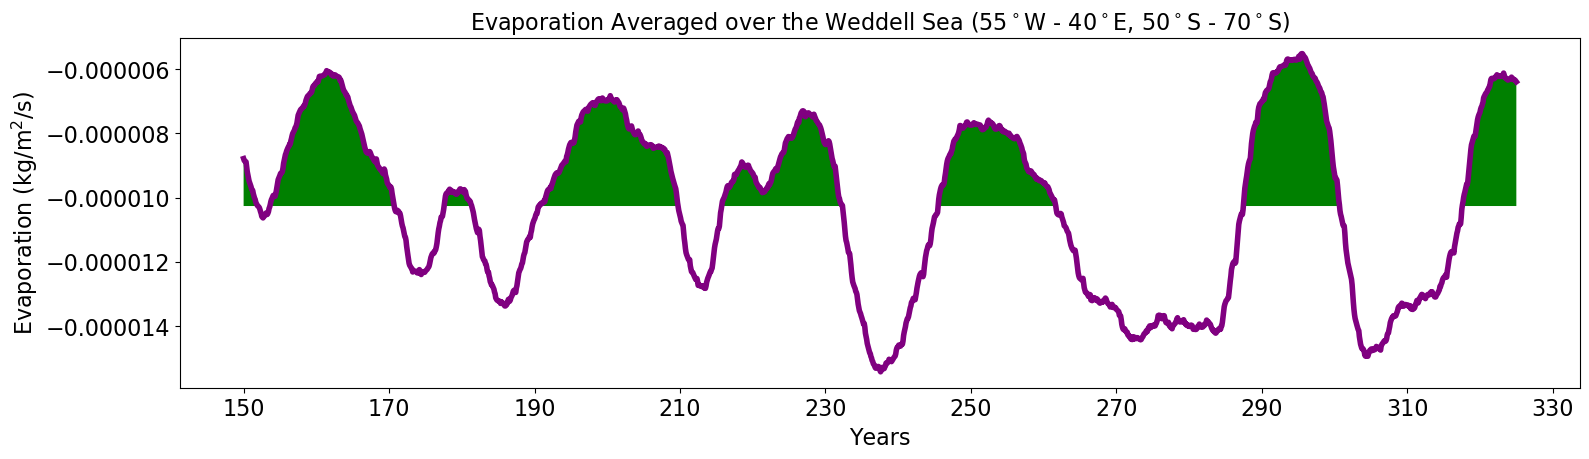

In [7]:
t = np.arange(0,2101,1)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
ax0.plot(ww2,'purple',linewidth=4)
ax0.fill_between(t,mean,ww2,where=ww2 > mean,facecolor='green', alpha=1)
#plt.hlines(-mean, 0, 2200, colors = "red",linestyles = "dashed")
#plt.axhspan(std,0.000005,facecolor='yellow', alpha=1)
#plt.axhspan(-std,std,facecolor='lightblue', alpha=1)
#plt.axhspan(-0.000003,-std,facecolor='lightgreen', alpha=1)
plt.xticks(range(0,3720,240), ['150','170',\
                            '190','210','230', '250', '270','290','310','330'],**my_font)
#plt.yticks(np.arange(-0.6,0.6,0.2), ['-0.6', '-0.4', '-0.2', '0','0.2','0.4','0.6'],**my_font)
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('Evaporation (kg/m$^2$/s)',**my_font)
plt.axis("tight")

#ax0.set(ylim=(-0.000003, 0.000005),xlim=(0, 3720))
ax0.set_title('Evaporation Averaged over the Weddell Sea (55$^\circ$W - 40$^\circ$E, 50$^\circ$S - 70$^\circ$S)',**my_font)
################################################
#ax2 = ax0.twinx() 
#ax2.plot(WDWF,'blue',linewidth=4)


###################################
#plt.hlines(0, 0, 3720, colors = "g",linestyles = "dashed")
#plt.yticks(**my_font)
#plt.xlabel('Years',**my_font)
#plt.ylabel('WDW($^\circ$C)',**my_font)
#ax2.set(ylim=(-0.3, 0.3),xlim=(0, 3720))
########################################
plt.savefig("Evaption2.png",bbox_inches='tight',dpi=fig.dpi)

In [8]:
np.save(file="EVA330-2new.npy", arr=result1)

In [10]:
lal2 = np.loadtxt("EVAP-new1.out")

In [12]:
lal2.shape

(2040,)

In [13]:
ru = np.hstack((result1,lal2))

In [14]:
ww2 = np.convolve(ru, np.ones((60,))/60, mode='valid')
mean = np.mean(ww2)

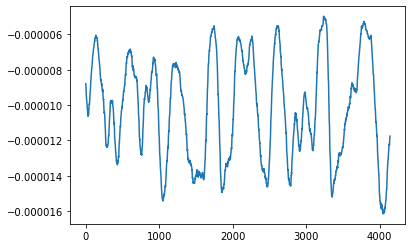

In [15]:
plt.plot(ww2)

In [16]:
ww2.shape

(4141,)

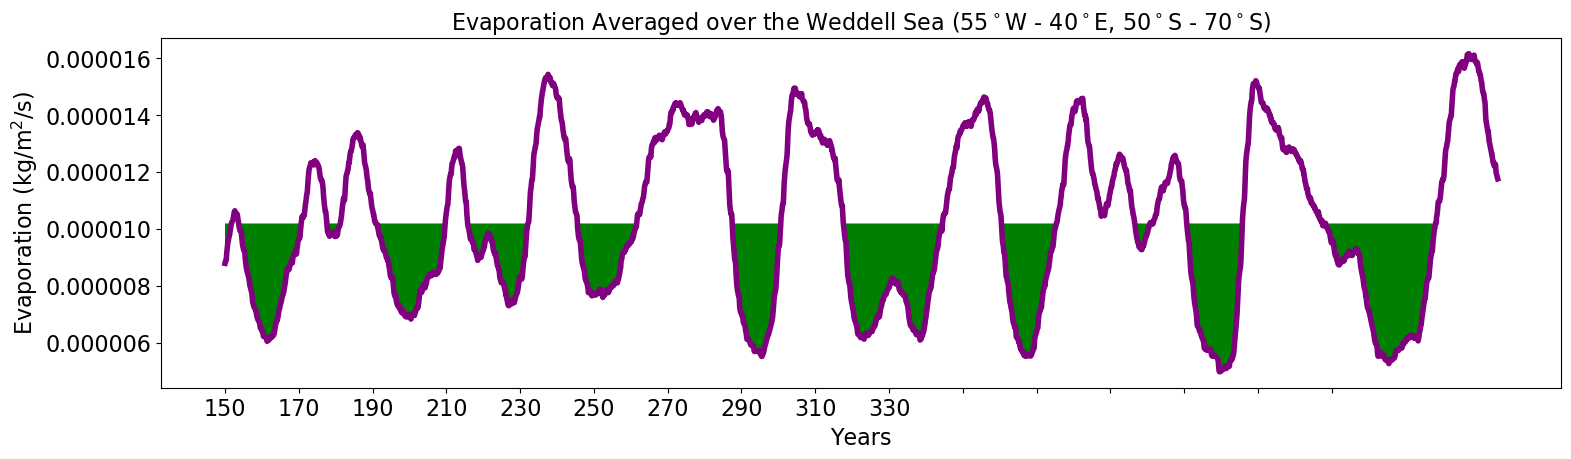

In [19]:
t = np.arange(0,4141,1)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
ax0.plot(-ww2,'purple',linewidth=4)
ax0.fill_between(t,-mean,-ww2,where=-ww2 < -mean,facecolor='green', alpha=1)
#plt.hlines(-mean, 0, 2200, colors = "red",linestyles = "dashed")
#plt.axhspan(std,0.000005,facecolor='yellow', alpha=1)
#plt.axhspan(-std,std,facecolor='lightblue', alpha=1)
#plt.axhspan(-0.000003,-std,facecolor='lightgreen', alpha=1)
plt.xticks(range(0,3720,240), ['150','170',\
                            '190','210','230', '250', '270','290','310','330'],**my_font)
#plt.yticks(np.arange(-0.6,0.6,0.2), ['-0.6', '-0.4', '-0.2', '0','0.2','0.4','0.6'],**my_font)
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('Evaporation (kg/m$^2$/s)',**my_font)
plt.axis("tight")

#ax0.set(ylim=(-0.000003, 0.000005),xlim=(0, 3720))
ax0.set_title('Evaporation Averaged over the Weddell Sea (55$^\circ$W - 40$^\circ$E, 50$^\circ$S - 70$^\circ$S)',**my_font)
################################################
#ax2 = ax0.twinx() 
#ax2.plot(WDWF,'blue',linewidth=4)


###################################
#plt.hlines(0, 0, 3720, colors = "g",linestyles = "dashed")
#plt.yticks(**my_font)
#plt.xlabel('Years',**my_font)
#plt.ylabel('WDW($^\circ$C)',**my_font)
#ax2.set(ylim=(-0.3, 0.3),xlim=(0, 3720))
########################################
plt.savefig("Evaption2.png",bbox_inches='tight',dpi=fig.dpi)

In [20]:
d2 = ru.reshape(350,12)

In [21]:
d2mean = np.nanmean(d2,axis=1)

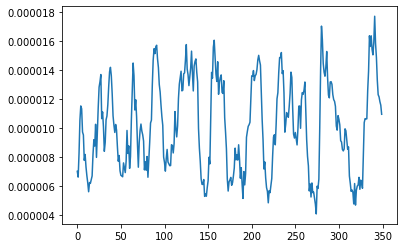

In [22]:
plt.plot(-d2mean)

In [23]:
wspxx = np.loadtxt("wspxx.out")
mrpxx = np.loadtxt("mrpxx.out")
noxx = np.loadtxt("noxx.out")

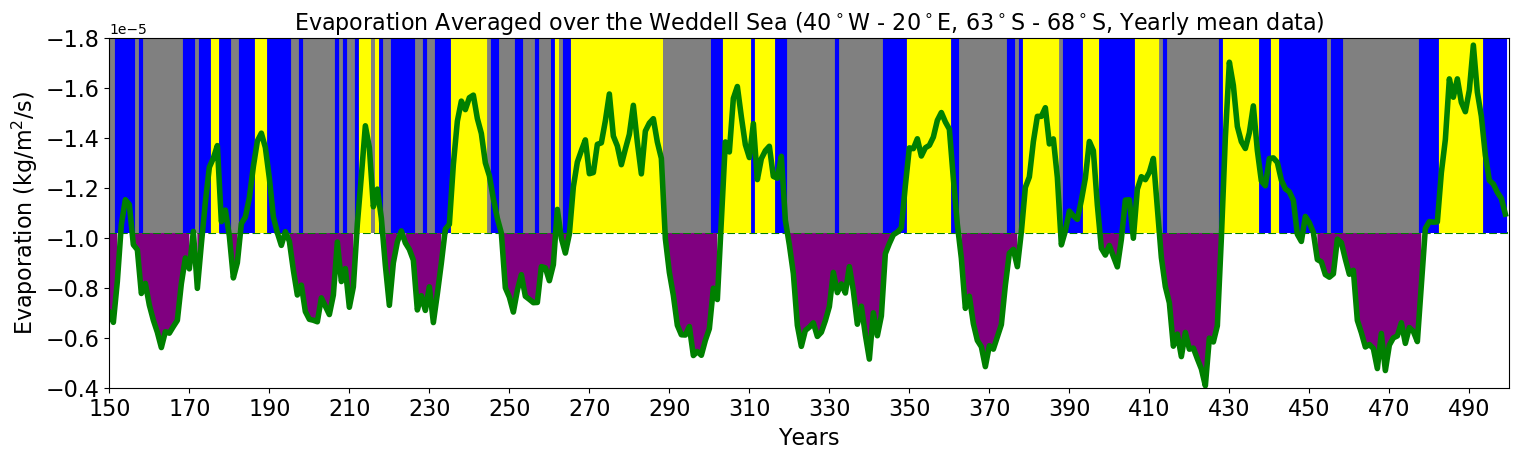

In [29]:
t = np.arange(0,350,1)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
ax0.plot(d2mean,'green',linewidth=4)
ax0.fill_between(t,mean,d2mean,where=d2mean > mean,facecolor='purple', alpha=1)
plt.hlines(mean, 0, 350, colors = "green",linestyles = "dashed")
plt.vlines(noxx, mean, -0.00002,colors = "grey",linewidth=3)
plt.vlines(mrpxx, mean, -0.00002, colors = "blue",linewidth=3)
plt.vlines(wspxx, mean, -0.00002, colors = "yellow",linewidth=3)
#plt.axhspan(std,0.000005,facecolor='yellow', alpha=1)
#plt.axhspan(-std,std,facecolor='lightblue', alpha=1)
#plt.axhspan(-0.000003,-std,facecolor='lightgreen', alpha=1)
#plt.xticks(range(0,3720,240), ['150','170',\
                            #'190','210','230', '250', '270','290','310','330'],**my_font)
plt.xticks(range(0,350,20), ['150','170','190','210','230', '250', '270','290','310','330','350', '370', '390','410','430','450','470','490','500'],**my_font)
#plt.yticks(np.arange(-0.6,0.6,0.2), ['-0.6', '-0.4', '-0.2', '0','0.2','0.4','0.6'],**my_font)
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('Evaporation (kg/m$^2$/s)',**my_font)
plt.axis("tight")
ax0.set(ylim=(-0.000004, -0.000018),xlim=(0, 350))
ax = plt.gca()
ax.yaxis.get_major_formatter().set_powerlimits((0,1))
ax0.set_title('Evaporation Averaged over the Weddell Sea (40$^\circ$W - 20$^\circ$E, 63$^\circ$S - 68$^\circ$S, Yearly mean data)',**my_font)
plt.savefig("Evaporationnew.png",bbox_inches='tight',dpi=fig.dpi)

In [30]:
np.savetxt('PE-new1.out', d2mean)

In [31]:
d2mean.shape

(350,)